## IMPORTING THE DATASET


In [2]:
medical_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [3]:
from urllib.request import urlretrieve
urlretrieve(medical_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x106555c40>)

In [4]:
!pip install --upgrade pandas 

import pandas as pd


Defaulting to user installation because normal site-packages is not writeable


In [5]:
med_df = pd.read_csv('medical.csv')

In [6]:
med_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## PERFORMING EXPLORATORY DATA ANALYSIS


In [9]:
%pip install --upgrade matplotlib seaborn plotly --quiet

Note: you may need to restart the kernel to use updated packages.


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [11]:
%pip install --upgrade pip

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['figure.facecolor'] = '#00000000'


In [13]:
!pip install --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeable


In [14]:
med_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### AGE 

#### Age is a numeric column. The minimum age in the dataset is 18, whereas the maximum age is 64. 
#### This means that we can use a histogram with 47 bins(1 for each year 64-18+1) - helps to visualize the distribution of age (number of people for every age)
#### Box plot - gives minimum/maximum/distribution; also tells where all the points lie (essence of distribution)

In [15]:
fig = px.histogram(med_df, x='age', marginal = 'box',nbins = 47, title = 'Distribution of age')
fig.update_layout(bargap=0.1)
fig.show()

#maginal = box -> gives a box plot right above the histogram

#### The distribution of ages in the dataset it almost uniform, with 20-30 customers at every age except for ages 18 and 19 which seem to have twice as many dustomers as other ages.

### BMI

In [16]:
fig = px.histogram(med_df,x='bmi',marginal='box', title = 'Distribution of bmi')
fig.update_layout(bargap = 0.1)
fig.show()

#### appears to show gaussian/normal distribution centered around the value 30


#### BMI categories 
##### - Under 18.5 kg/m2: Underweight, possibly malnourished
##### - 18.5 to 24.9 kg/m2: Healthy weight for young and middle-aged adults
##### - 25.0 to 29.9 kg/m2: Overweight
##### - 30.0 to 39.9 kg/m2: Obese class I
##### - 40.0 kg/m2 or more: Obese class II, III, or severe obesity


### CHARGES

In [17]:
fig = px.histogram(med_df,x='charges',marginal='box', title = 'Annual medical charges', color = 'smoker', color_discrete_sequence=['green','grey'])
fig.update_layout(bargap = 0.1)
fig.show()

#### Most of the non smokers spend between 0 - 14k while the people who smoke spend more. Its not clear whether they spend more because of smoking or is it because a large amount of the people who have taken the insurance are somkers. This can be considered as a power law distribution (A power-law distribution, also known as a heavy-tailed distribution, is a probability distribution where the probability of an event decreases proportionally to a power of its magnitude)

#### We might need a new category depicting the number of smokes per day to analyse the exact pattern

### SMOKER


In [18]:
med_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [19]:
px.histogram(med_df,x='smoker',color = 'sex',title = 'Smoker')

#### According to the histogram, it appears that 17.37% of women who have registered for the insurance are smokers whereas, 23.52% of the registered men are smokers

In [20]:
px.histogram(med_df,x='smoker',color = 'region',title = 'Smoker')

In [21]:
px.histogram(med_df,x='smoker',color = 'children',title = 'Smoker')

### Visualising the relationship between age(independent feature) and charges(dependent feature)

In [22]:
fig = px.scatter(med_df,x = 'age', y = 'charges',color = 'smoker',opacity = 0.5, hover_data = ['sex'], title = 'Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

### Visualising the relationship between bmi(independent feature) and charges(dependent feature)

In [23]:
fig = px.scatter(med_df,x = 'bmi', y = 'charges',color = 'smoker',opacity = 0.5, hover_data = ['sex'], title = 'Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

### It appears that for non-smokers an increase in bmi does not seem to be related to an increase in medical charges. However, medical charges seem ti be significantly higher for smokers with a bmi greater than 30

### Visualising the relationship between children(independent feature) and charges(dependent feature)

In [24]:
px.violin(med_df,x = 'children',y = 'charges') #using a scatterplot does not show the number of data points

#### The relationship b/w different features is often numerically expressed using a measure called the correlation coefficient
#### To compute the correlation for categorical columns, they must first be converted into numerical columns

In [25]:
med_df.charges.corr(med_df.age)

np.float64(0.29900819333064754)

In [26]:
med_df.charges.corr(med_df.bmi)

np.float64(0.19834096883362884)

In [27]:
med_df.charges.corr(med_df.children)

np.float64(0.0679982268479048)

In [28]:
smoker_val = {'no':0, 'yes':1}
smoker_num = med_df.smoker.map(smoker_val)
smoker_num

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [29]:
med_df.charges.corr(smoker_num)

np.float64(0.7872514304984772)

In [30]:
med_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

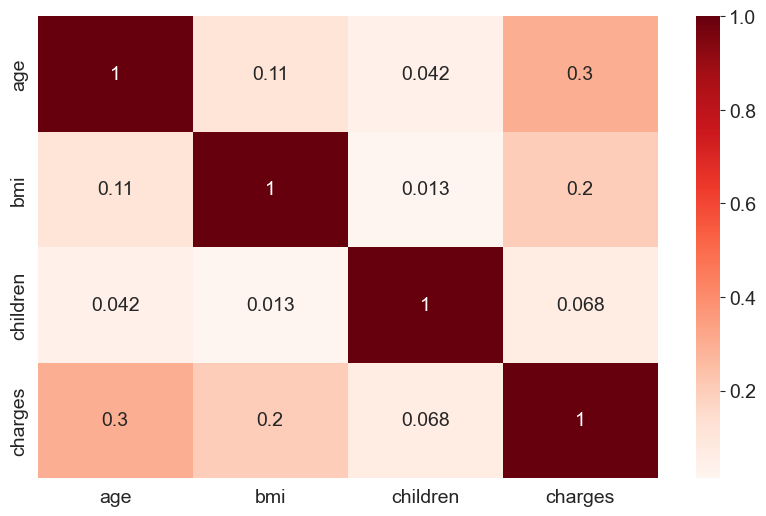

In [31]:
sns.heatmap(med_df.corr(numeric_only=True), cmap = 'Reds',annot=True)

#### 
A high correlation between two features (X and Y) does not imply a cause-effect relationship.
X can cause Y, Y can cause X, or they might both be influenced by an external factor (Z).
Correlation can also be misleading due to small sample sizes.
Computers can't differentiate between correlation and causation, which can lead to incorrect conclusions in automated systems.
Human insight is required to determine true cause-effect relationships.

# LINEAR REGRESSION USING A SINGLE FEATURE

### Visualising the relationship between age and charges for non smokers(cannot be compared independently because it is a categorical feature)

In [32]:
non_smoker_df = med_df[med_df.smoker == 'no']

In [33]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

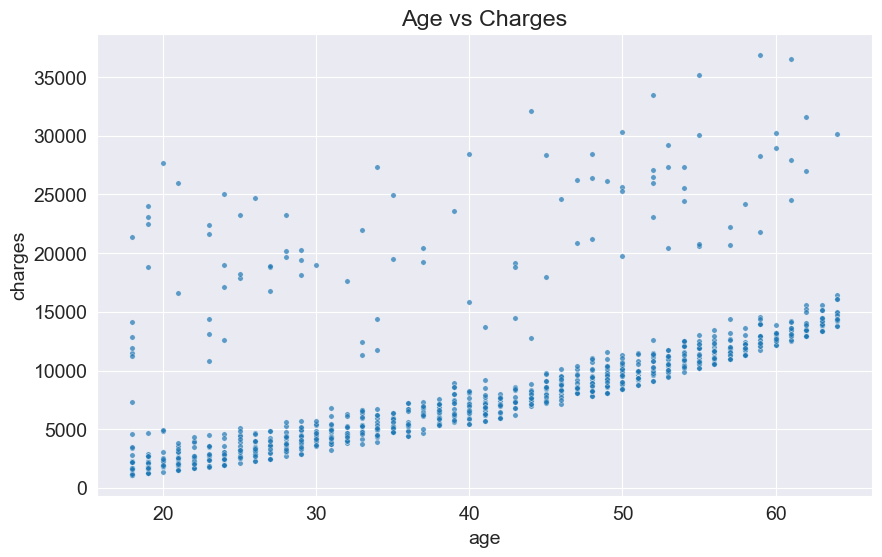

In [34]:
plt.title('Age vs Charges')
sns.scatterplot(data = non_smoker_df, x = 'age', y = 'charges', alpha = 0.7, s = 15)

 Apart from a few exceptions, the points seem to form a line. We will try to fit a straight line through these points, and use this line to predict charges for age given age.
 
 y = mx + c 
 
 here, m = slope and c = y intercept, x = age, y = charges
 
 m and c are the coefficients/weights/parameters

 our task is to determine the appropriate values of m and y for the line (i.e, the coefficient values that best fit the data)

In [35]:
def estimate_charges(age,w,b):
    return w*age + b

In [36]:
estimate_charges(25,12,10)

310

In [37]:
w = 50
b = 100

In [38]:
ages = non_smoker_df.age 
estimate_charge = estimate_charges(ages,w,b)


to plot the estimated charges using a line graph

Text(0, 0.5, 'estimated charges')

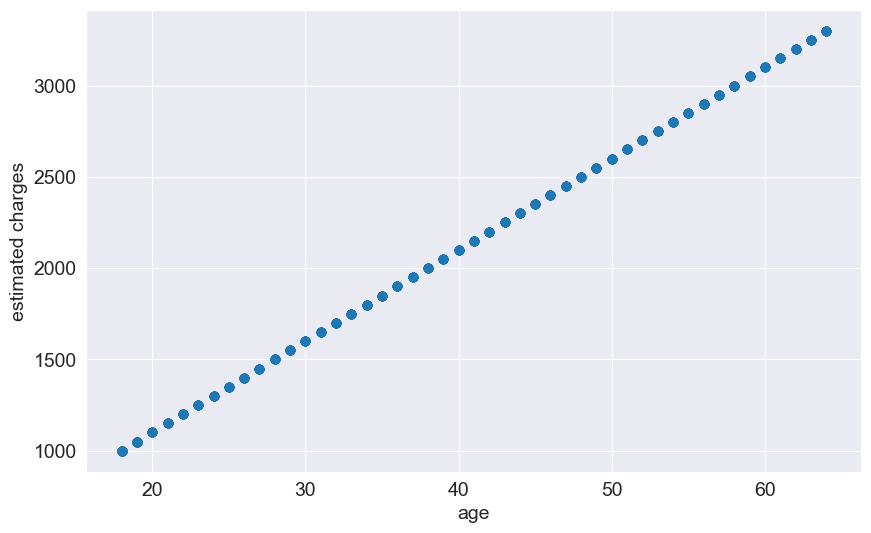

In [39]:
plt.scatter(ages,estimate_charge)
plt.xlabel('age')
plt.ylabel('estimated charges')

Text(0, 0.5, 'estimated charges')

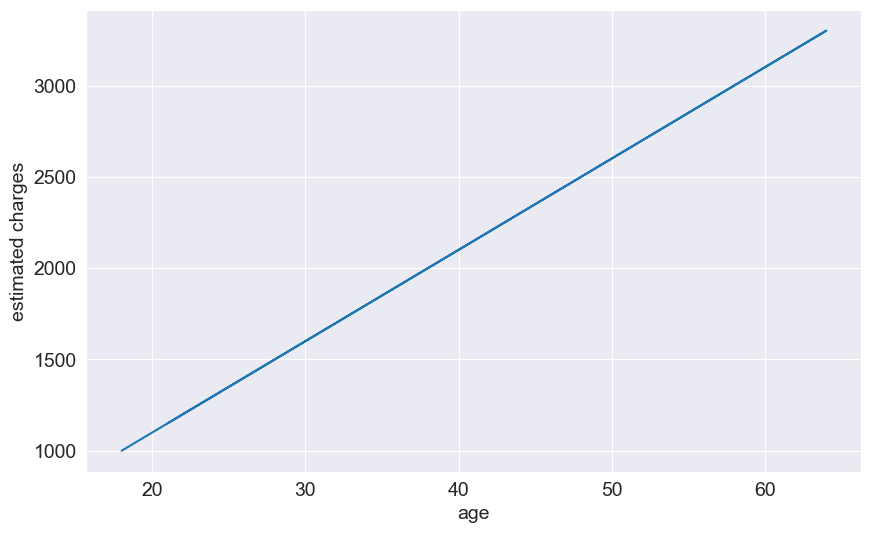

In [40]:
plt.plot(ages,estimate_charge)
plt.xlabel('age')
plt.ylabel('estimated charges')


we can overlay this line on the actual data points to see how well our model fits the data

The estimates are quite poor and the line does not fit the data

To get the best fit line, we have to try different values of w and b and find the best fit line. We can do so by using a helper function with takes w and b as inputs and creates the above plot for the respective values

In [41]:
def helper(w,b):
    ages = non_smoker_df.age 
    target = non_smoker_df.charges
    estimated_charge = estimate_charges(ages,w,b)
    # plotting the graph of actual charges vs predicted charges
    plt.plot(ages,estimated_charge,'r')
    plt.scatter(ages,target)
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.legend(['estimate','actual'])

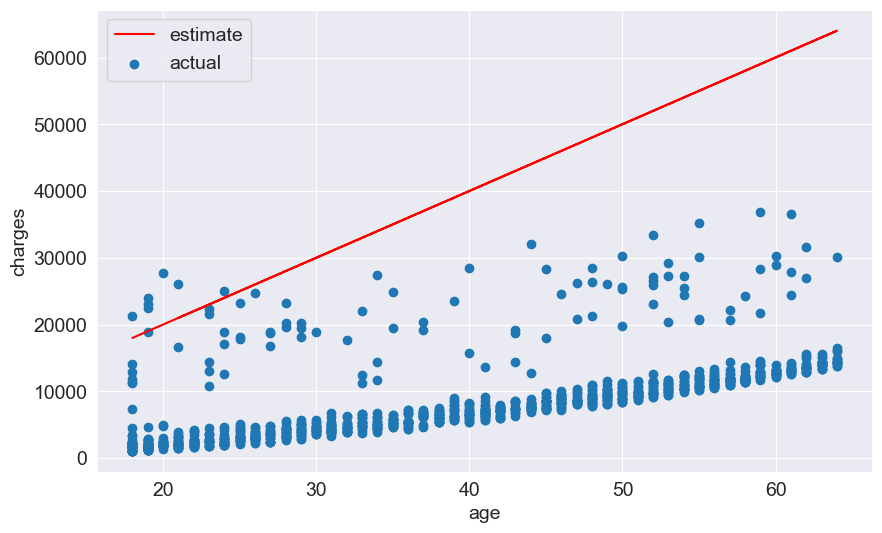

In [42]:
helper(1000,10)

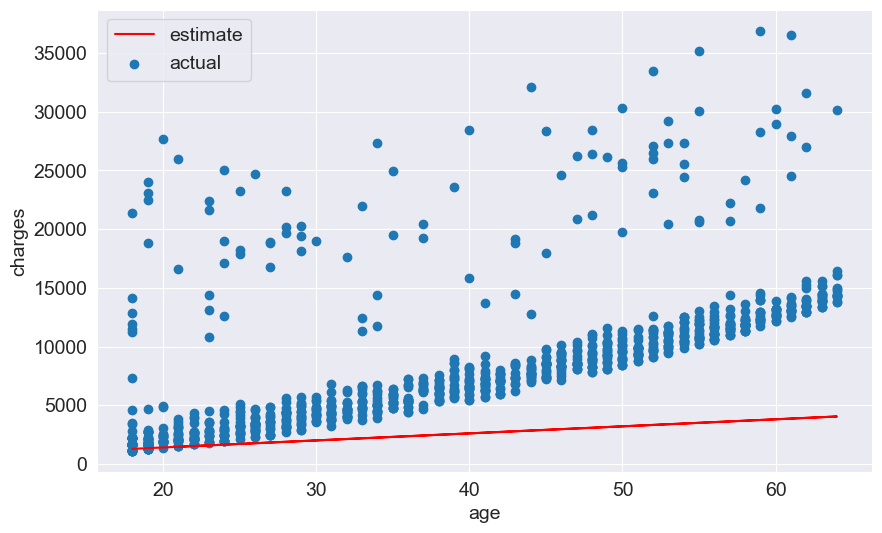

In [43]:
helper(60,200)

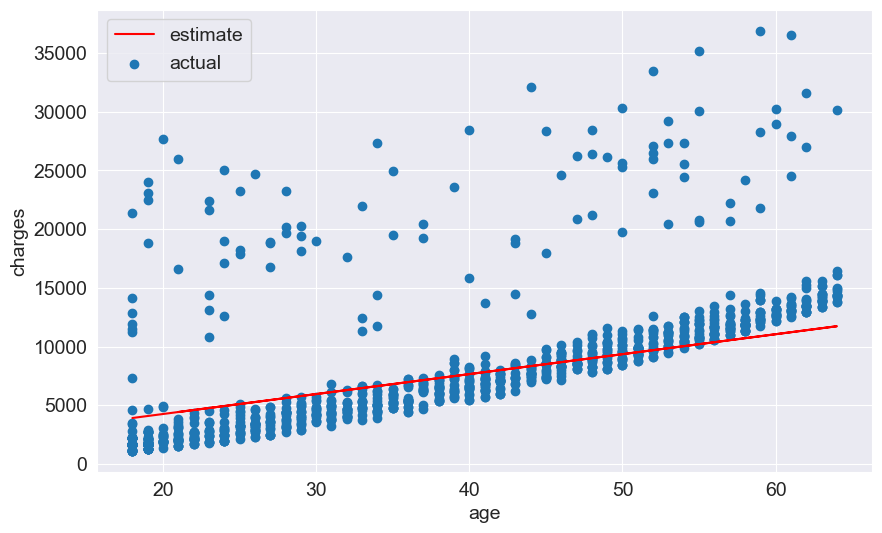

In [44]:
helper(170,850)

In [45]:
import numpy as np

In [46]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

In [47]:
w = 50
b = 100

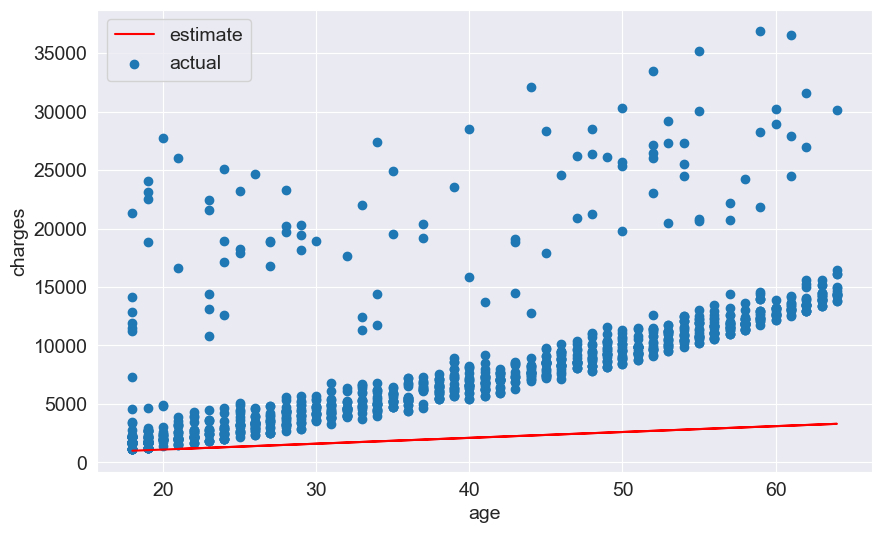

In [48]:
helper(w,b)

In [49]:
targets = non_smoker_df.charges
predictions = estimate_charges(non_smoker_df.age,w,b)

In [50]:
rmse(targets,predictions)

np.float64(8461.949562575493)

on average, each element in the prediction differs from the actual charges vy $8461

In [51]:
def helper(w,b):
    ages = non_smoker_df.age 
    target = non_smoker_df.charges
    estimated_charge = estimate_charges(ages,w,b)
    # plotting the graph of actual charges vs predicted charges
    plt.plot(ages,estimated_charge,'r')
    plt.scatter(ages,target)
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.legend(['estimate','actual'])
    print(rmse(target,estimated_charge))

4816.941379466545


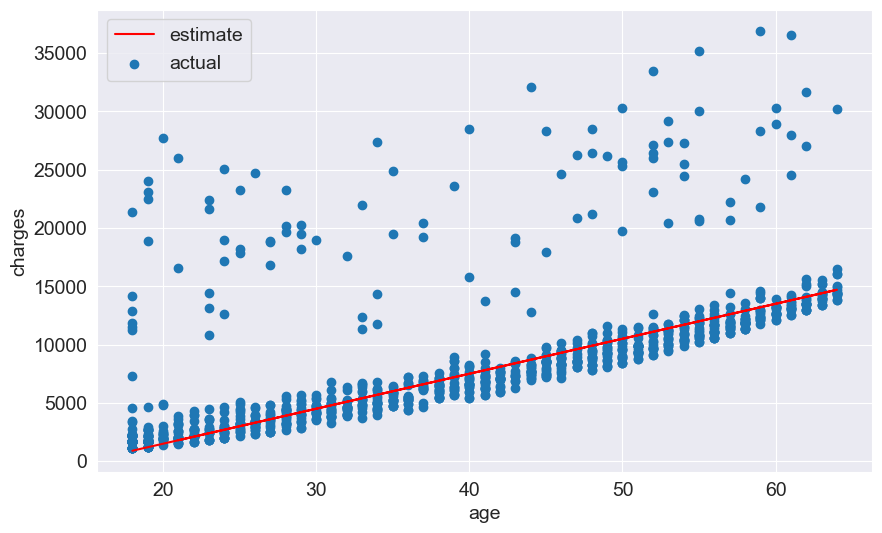

In [52]:
helper(300,-4500)

## LINEAR REGRESSION USING SCIKIT LEARN

In [53]:
!pip install scikit-learn --quiet

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [55]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [56]:
input = non_smoker_df[['age']] #because we want a dataframe(2d)
target = non_smoker_df.charges
print(input.shape)
print(target.shape)

(1064, 1)
(1064,)


In [57]:
model.fit(input,target)

LinearRegression()

In [58]:
model.predict(np.array([[23],[37],[61]]))

/Users/kritika/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [59]:
pred = model.predict(input)

In [60]:
pred

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [61]:
rmse(target,pred)

np.float64(4662.505766636395)

In [62]:
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [63]:
#w
model.coef_

array([267.24891283])

In [64]:
#b
model.intercept_

np.float64(-2091.420556565021)

4662.516524487403


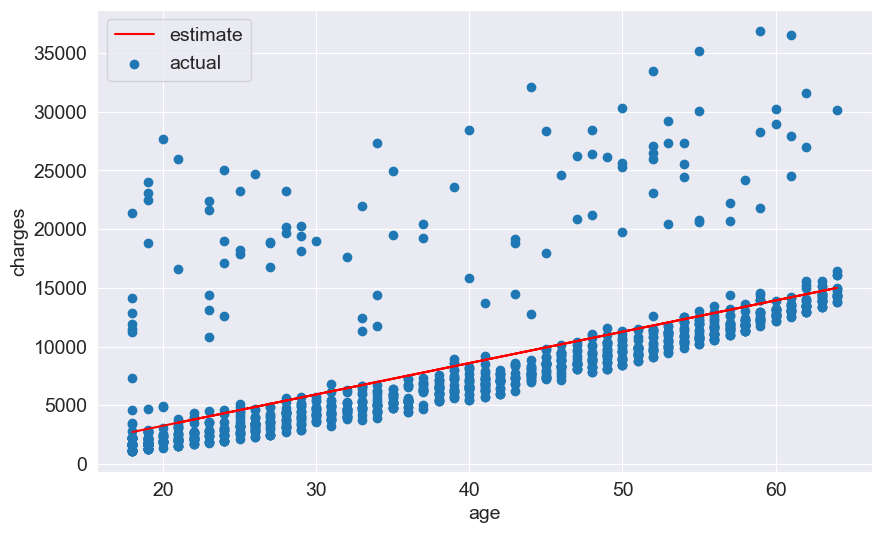

In [65]:
helper(267,-2091)

## BINARY CATEGORIES

<Axes: xlabel='smoker', ylabel='charges'>

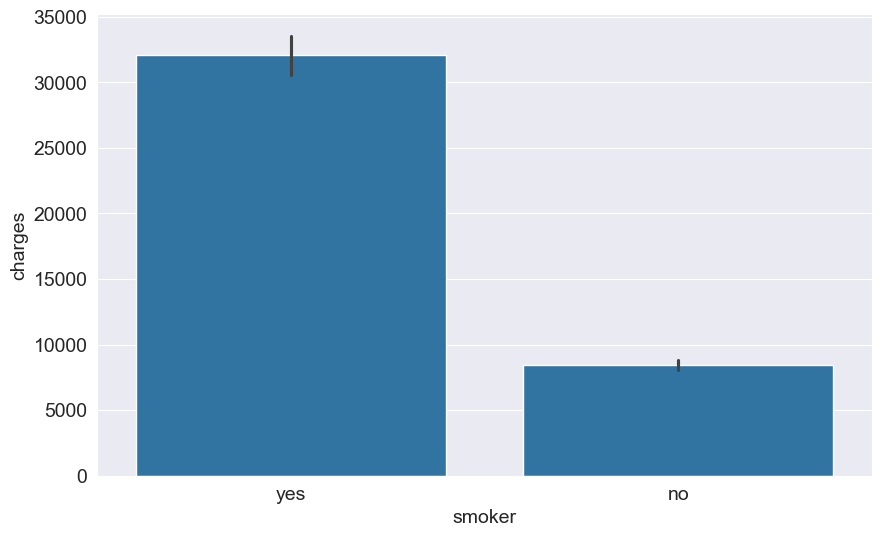

In [66]:
sns.barplot(data = med_df, x = 'smoker', y = 'charges')

In [67]:
smoker_codes = {'no':0,'yes':1}
med_df['smoker_code'] = med_df.smoker.map(smoker_codes)

In [68]:
med_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


In [69]:
med_df.charges.corr(med_df.smoker_code)

np.float64(0.7872514304984772)

we can now use the smoker code column for linear regression just like any of the other columns

In [70]:
inputs = med_df[['age','bmi','children','smoker_code']]
target = med_df.charges

In [71]:
model.fit(inputs,target)
pred = model.predict(inputs)
rmse(target,pred)

np.float64(6056.439217188081)

similarly can be done for the sex column also

however, the region column contains 4 categories so we need to apply one hot encoding to it

<Axes: xlabel='region', ylabel='charges'>

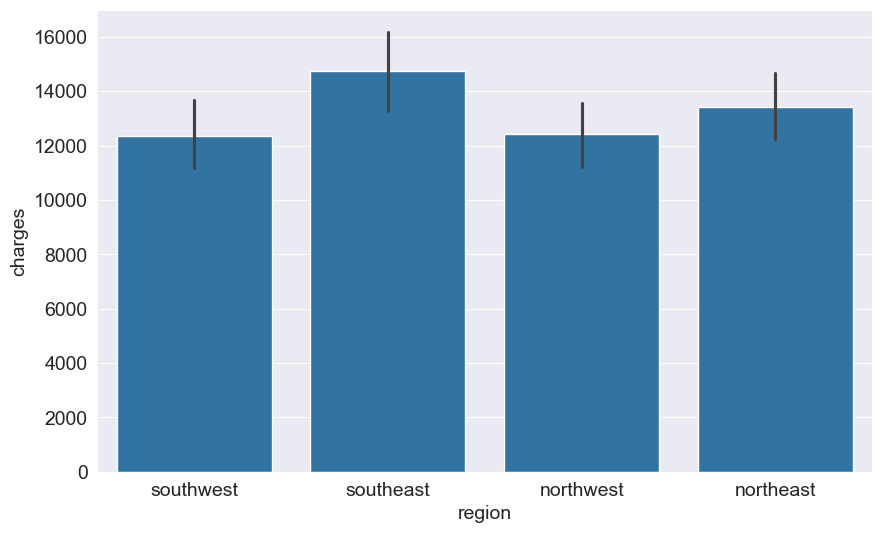

In [72]:
sns.barplot(med_df,x = 'region',y='charges')

In [73]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(med_df[['region']]) #identifies the categories
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [74]:
enc.transform([['northeast']]).toarray()

/Users/kritika/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but OneHotEncoder was fitted with feature names



array([[1., 0., 0., 0.]])

In [75]:
one_hot = enc.transform(med_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [76]:
med_df[['northeast','northwest','southeast','southwest']] = one_hot

In [77]:
med_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0.0,0.0,0.0,1.0


In [78]:
inputs = med_df[['age','bmi','children','smoker_code','northeast','northwest','southeast','southwest']]
target = med_df.charges

model.fit(inputs,target)
pred = model.predict(inputs)
rmse(target,pred)

np.float64(6042.033215394104)

## APPLYING STANDARDISATION

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age','bmi','children']
scaler.fit(med_df[num_cols])

StandardScaler()

In [80]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [81]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [82]:
med_df[num_cols]

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


this is the data that we want to transform

In [83]:
scaled_inputs = scaler.transform(med_df[num_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

now the numerical columns have been scaled and can now be combined with categorical data

In [84]:
cat_cols = ['smoker_code','northeast','northwest','southeast','southwest']
cat_data = med_df[cat_cols].values

In [85]:
cat_data

array([[1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0.]])

In [86]:
inputs = np.concatenate((scaled_inputs,cat_data),axis=1)
targets = med_df.charges
model = LinearRegression()
model.fit(inputs,targets)
pred = model.predict(inputs)
loss = rmse(targets,pred)
print(loss)

6042.033215394104


In [87]:
np.concatenate((scaled_inputs,cat_data),axis=1)

array([[-1.43876426, -0.45332   , -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [-1.50996545,  0.5096211 , -0.07876719, ...,  0.        ,
         1.        ,  0.        ],
       [-0.79795355,  0.38330685,  1.58092576, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ...,  0.        ,
         1.        ,  0.        ],
       [-1.29636188, -0.79781341, -0.90861367, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.        ,
         0.        ,  0.        ]])

In [88]:
model.coef_

array([ 3609.11919668,  2064.46835233,   571.87260941, 23836.30050226,
         586.47922829,   234.2971161 ,  -447.88089913,  -372.89544526])

In [89]:
model.intercept_

np.float64(8402.640125136902)

In [90]:
new_customer = [[28,30,2,1,0,1,0,0]]

In [91]:
scaler.transform([[28,30,2]])

/Users/kritika/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.79795355, -0.10882659,  0.75107928]])

In [92]:
model.predict([[-0.79795355, -0.10882659,  0.75107928, 1,0,1,0,0]])

array([29798.18088493])

## CREATING A TRAINING AND TEST SET

In [93]:
from sklearn.model_selection import train_test_split
input_train, input_test,output_train,output_test = train_test_split(inputs,targets,test_size=0.25)

In [97]:
model=LinearRegression()
model.fit(input_train,output_train)
pred_test = model.predict(input_test)
pred_train = model.predict(input_train)

loss_test = rmse(output_test,pred_test)
loss_train = rmse(output_train,pred_train)
print(loss_train)
print(loss_test)

5897.661924902784
6503.976607528342


test loss is always more than training loss because the model has not been trained on the test set